In [2]:
# Import data libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#  Display all the columns of a DataFrame
pd.options.display.max_columns = None

## Step 1:

In [6]:
# Import the dataset 
path = '/Users/vinhdao/Documents/Instacart Basket Analysis'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'aggregated_ords_prods_merge.pkl'))

## Step 2:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   eval_set                object  
 8   order_number            int64   
 9   orders_day_of_week      int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  prices_range_loc        object  
 16  busiest_day             object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_spend           float64 
 21  spende

For the dataset, its contained all the PII aspects such as the customer name, d.o.b which can easily to traced back to the customer indentity. A consultation is needed to treat with the data in this case.

## Step 3:

In [10]:
# Creating list of states in each region based on Wikipedia
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Assign the region for state

df.loc[df['State'].isin(Northeast),'region'] = 'Northeast'
df.loc[df['State'].isin(Midwest),'region'] = 'Midwest'
df.loc[df['State'].isin(South),'region'] = 'South'
df.loc[df['State'].isin(West),'region'] = 'West'

In [13]:
df = df.drop(columns = ['_merge'])

In [15]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,NaN,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,NaN,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,NaN,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent Customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,NaN,Mid-range product,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,NaN,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  price_range_loc         object 
 15  prices_range_loc        object 
 16  busiest_day             object 
 17  busiest_period_of_day   object 
 18  max_order               int64  
 19  loyalty_flag            object 
 20  average_spend           float64
 21  spender_flag            objec

In [22]:
df['spender_flag'].value_counts(dropna = False)


spender_flag
Low_spender     31798751
High_spender      635461
Name: count, dtype: int64

In [24]:
crosstab = pd.crosstab(df['region'], df['spender_flag'])

In [25]:
crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


In [28]:
crosstab.to_clipboard()

## Analysis and Conclusion

### Overall Spending Patterns:

- The South has the highest number of both high spenders and low spenders, suggesting a larger customer base or higher variability in spending.
- The Northeast has the lowest number of both high spenders and low spenders, indicating a smaller customer base or more consistent spending habits.
### Proportion of High Spenders:

To understand spending habits more clearly, it's useful to look at the proportion of high spenders to the total number of customers in each region:

- Midwest: ≈2.05 %


- Northeast: ≈1.89 %


- South: ≈1.94%


- West: ≈1.94%

### Regional Insights:

- The Midwest has the highest proportion of high spenders (2.05%), followed by the West and South (both 1.94%), and the Northeast (1.89%).
- Despite the South having the highest absolute number of high spenders, the proportion of high spenders in the South is slightly lower than in the Midwest.


### Conclusion
- While the South has the highest number of high spenders in absolute terms, the Midwest has a slightly higher proportion of high spenders relative to its customer base. 

- This indicates that, on average, customers in the Midwest are more likely to be high spenders compared to other regions. The Northeast, despite having the lowest numbers, has spending habits comparable to the South and West in terms of proportion. These insights can guide targeted marketing and resource allocation to different regions based on customer spending behavior.

## Step 4: Create an exclusion flag for low-activity customers

In [30]:
# Preview the datasheet
df[df['department_id'] == 18]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region
5870,15,Overnight Diapers Size 6,56,18,11.2,2644315,31159,prior,15,2,9,14.0,1,0,NaN,Mid-range product,Regularly busy,Most orders,30,Regular customer,7.984559,Low_spender,6.0,Frequent Customer,Phyllis,Russell,Female,West Virginia,29,9/7/2019,2,married,63035,South
5871,15,Overnight Diapers Size 6,56,18,11.2,278392,145277,prior,9,0,13,2.0,6,0,NaN,Mid-range product,Busiest days,Most orders,25,Regular customer,8.527273,Low_spender,7.0,Frequent Customer,Willie,Wyatt,Male,North Dakota,53,2/8/2017,0,single,157638,Midwest
5872,15,Overnight Diapers Size 6,56,18,11.2,2986875,202112,prior,17,0,16,3.0,6,0,NaN,Mid-range product,Busiest days,Most orders,39,Regular customer,7.814506,Low_spender,4.0,Frequent Customer,Andrew,Booker,Male,Wisconsin,62,8/26/2017,2,married,123490,Midwest
5873,15,Overnight Diapers Size 6,56,18,11.2,67199,202112,prior,28,2,7,4.0,1,1,NaN,Mid-range product,Regularly busy,Average orders,39,Regular customer,7.814506,Low_spender,4.0,Frequent Customer,Andrew,Booker,Male,Wisconsin,62,8/26/2017,2,married,123490,Midwest
43278,63,Banana & Sweet Potato Organic Teething Wafers,92,18,13.4,2554367,914,prior,8,1,12,7.0,7,0,NaN,Mid-range product,Busiest days,Most orders,33,Regular customer,7.607879,Low_spender,6.0,Frequent Customer,Douglas,Smith,Male,Virginia,71,9/2/2018,2,married,109614,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292125,49583,Sweet Potatoes Stage 2,92,18,2.4,97437,204736,prior,5,1,11,22.0,4,1,NaN,Low-range product,Busiest days,Most orders,6,New customer,7.916667,Low_spender,30.0,Non_frequent_customer,Janet,Lester,Female,Nebraska,74,8/4/2019,1,married,106032,Midwest
32292126,49583,Sweet Potatoes Stage 2,92,18,2.4,1879295,205083,prior,34,2,13,17.0,11,0,NaN,Low-range product,Regularly busy,Most orders,38,Regular customer,7.774819,Low_spender,7.0,Frequent Customer,Kimberly,Anderson,Female,Hawaii,47,12/6/2018,2,married,98246,West
32292127,49583,Sweet Potatoes Stage 2,92,18,2.4,2713755,205280,prior,3,5,12,6.0,25,0,NaN,Low-range product,Regularly busy,Most orders,46,Loyal customer,7.302344,Low_spender,7.0,Frequent Customer,Stephanie,Correa,Female,California,26,3/18/2017,1,married,93341,West
32292128,49583,Sweet Potatoes Stage 2,92,18,2.4,222294,205576,prior,1,2,15,NaN,17,0,NaN,Low-range product,Regularly busy,Most orders,3,New customer,8.061111,Low_spender,30.0,Non_frequent_customer,Christine,Glover,Female,Vermont,61,7/20/2017,1,married,109148,Northeast


In [32]:
df.loc[df['order_number'] < 5, 'exclusion_flag'] = 'exclude'
df.loc[df['order_number'] >= 5, 'exclusion_flag'] = 'include'

In [34]:
df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    24436791
exclude     7997421
Name: count, dtype: int64

In [36]:
df_final = df[df['exclusion_flag'] == 'include']

In [37]:
df_final['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    24436791
Name: count, dtype: int64

In [38]:
df_final = df_final.drop(columns = ['exclusion_flag'])

In [ ]:
# Export the dataset

df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

## Step 5: Profiling customer Data

In [41]:
df_final = df_final.drop(columns = 'price_range_loc')
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434205,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,prior,7,1,15,30.0,5,1,Mid-range product,Busiest days,Most orders,31,Regular customer,6.058416,Low_spender,8.0,Frequent Customer,Julie,Newton,Female,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest
32434206,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,prior,10,4,14,30.0,17,0,Mid-range product,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent Customer,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,South
32434209,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,3,8,15.0,12,0,Mid-range product,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest
32434210,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,3,15,5.0,11,1,Mid-range product,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24436791 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  prices_range_loc        object 
 15  busiest_day             object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_spend           float64
 20  spender_flag            object 
 21  Customer_frequency      float64
 2

In [44]:
df_final['product_id'].value_counts(dropna = False)

product_id
24852    358668
13176    303632
21137    201955
21903    184749
47209    169658
          ...  
10593         1
14770         1
13433         1
40437         1
18506         1
Name: count, Length: 49416, dtype: int64

In the next step, we will explore the current age group in the current Instacart customer group

In [45]:
df_final['Age'].value_counts(dropna = False)

Age
48    403988
49    403419
79    402695
31    401876
64    400862
       ...  
28    364226
60    362084
66    356663
25    353379
41    353293
Name: count, Length: 64, dtype: int64

In [46]:
df_final['marital_status'].value_counts(dropna = False)

marital_status
married                             17153469
single                               4019626
divorced/widowed                     2091161
living with parents and siblings     1172535
Name: count, dtype: int64

In [52]:
df_final['n_dependants'].value_counts(dropna = False)

n_dependants
3    6138887
0    6110787
2    6099639
1    6087478
Name: count, dtype: int64

In [54]:
df_final['income'].value_counts(dropna = False)

income
72344     4084
57501     3945
112610    3935
115620    3633
36163     3530
          ... 
155675       1
30485        1
33539        1
38904        1
37155        1
Name: count, Length: 96070, dtype: int64

In [56]:
df_final.loc[df['Age'] < 35, 'Age group'] = 'Young'
df_final.loc[(df['Age'] >= 35) & (df['Age'] <= 65), 'Age group'] = 'Middle-age'
df_final.loc[(df['Age'] > 65) & (df['Age'] <= 80), 'Age group'] = 'Senior'
df_final.loc[df['Age'] > 80, 'Age group'] = 'Elderly'

In [57]:
df_final['Age group'].value_counts(dropna = False)

Age group
Middle-age    11832977
Young          6506370
Senior         5715582
Elderly         381862
Name: count, dtype: int64

Profiling the customer age

In [60]:
df_final.loc[df['income'] < 30000, 'Income group'] = 'Low income'
df_final.loc[(df['income'] >= 30000) & (df['income'] <= 50000), 'Income group'] = 'Lower-Middle income'
df_final.loc[(df['income'] > 50000) & (df['income'] <= 100000), 'Income group'] = 'Middle income'
df_final.loc[(df['income'] > 100000) & (df['income'] <= 200000), 'Income group'] = 'Upper-Middle income'
df_final.loc[df['income'] > 200000, 'Income group'] = 'High income'

In [61]:
df_final['Income group'].value_counts(dropna = False)

Income group
Upper-Middle income    11024030
Middle income          10605133
Lower-Middle income     2449087
High income              210958
Low income               147583
Name: count, dtype: int64

### Profiling the customer income in US:
- Low Income: Less than $30,000 annually.

- Lower Middle Income: $30,000 - $50,000 annually.

- Middle Income: $50,000 - $100,000 annually.

- Upper Middle Income: $100,000 - $200,000 annually.

- High Income: More than $200,000 annually.

(From: NerdWallet)

In [64]:
df_final['department_id'].value_counts (dropna = False)

department_id
4     7227091
16    4132060
19    2187121
7     2036466
1     1628844
13    1385520
3      886698
15     787790
20     783011
9      633725
17     539349
14     530401
12     523891
18     335947
11     328569
6      197900
5      108002
8       72115
21      57567
10      27558
2       27166
Name: count, dtype: int64

In [66]:
df_final['reordered'].value_counts (dropna = False)

reordered
1    16941793
0     7494998
Name: count, dtype: int64

In [68]:
df_final 

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434205,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,prior,7,1,15,30.0,5,1,Mid-range product,Busiest days,Most orders,31,Regular customer,6.058416,Low_spender,8.0,Frequent Customer,Julie,Newton,Female,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest,Young,Low income
32434206,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,prior,10,4,14,30.0,17,0,Mid-range product,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent Customer,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,South,Middle-age,Upper-Middle income
32434209,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,3,8,15.0,12,0,Mid-range product,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income
32434210,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,3,15,5.0,11,1,Mid-range product,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income


In [70]:
# Explore the group purchasing
crosstab = pd.crosstab(df_final['spender_flag'], df_final['frequency_flag'], dropna = False)

crosstab

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
spender_flag,,,
High_spender,361486,26445,95597
Low_spender,17790213,1438224,4724826


In [71]:
# Invetstigate the frequency of customer to put into order
crosstab1 = pd.crosstab(df_final['frequency_flag'], df['order_hour_of_day'], dropna = False)

crosstab1

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
frequency_flag,,,,,,,,,,,,,,,,,,,,,,,,
Frequent Customer,115247,59240,35726,25660,28172,52302,182883,560873,1065805,1487676,1609542,1542924,1438966,1466548,1486657,1449950,1355257,1091478,849873,664053,542460,457791,360669,221947
Non_frequent_customer,11244,5233,3118,2833,2636,3633,9892,31915,61486,95483,119332,125269,122715,127158,125550,129537,125281,103939,78577,59689,42201,33091,26515,18342
Regular customer,34160,18942,11217,8824,8880,12095,35427,112688,223995,327767,392235,404433,401647,405148,407855,410332,401126,339730,265265,196261,140954,111026,90218,60198


In [74]:
# Explore the time customer feel uncertain when already put a goods into cart
crosstab2 = pd.crosstab(df_final['frequency_flag'], df['add_to_cart_order'], dropna = False)

crosstab2

add_to_cart_order,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
frequency_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Frequent Customer,1802634,1725407,1626313,1511162,1383223,1250007,1116847,988521,871195,765565,671757,588789,515273,450011,392447,341685,296796,257705,223469,193148,166695,143903,123807,106421,91411,78551,67359,57738,49527,42337,36183,30864,26454,22632,19310,16413,13929,11899,10099,8702,7466,6374,5472,4690,4011,3436,2967,2542,2215,1916,1661,1467,1270,1109,960,841,749,669,581,515,441,379,341,307,272,246,219,198,180,168,152,136,127,116,100,93,88,81,77,74,70,68,61,57,49,47,42,40,35,33,32,29,23,21,20,17,15,15,13,12,9,8,8,8,6,6,6,6,5,4,4,4,3,3,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Non_frequent_customer,148506,137954,126698,115973,105526,95654,86275,77348,68916,61475,54455,48328,42742,37756,33220,29148,25560,22401,19469,17005,14811,12819,11128,9646,8420,7291,6303,5453,4709,4120,3519,3038,2634,2256,1929,1672,1430,1244,1071,901,774,655,568,503,424,360,308,274,242,211,183,161,135,122,106,92,85,78,69,63,52,43,38,36,32,31,26,24,21,20,17,13,11,10,9,8,8,6,6,6,5,5,5,5,5,3,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Regular customer,462785,439268,411593,381938,351627,321149,290816,261222,233474,207789,184145,162968,143863,126633,111245,97580,85272,74328,64571,56210,48739,42045,36356,31414,27183,23344,20134,17351,14843,12724,10945,9366,8025,6901,5853,5004,4304,3704,3206,2761,2372,2052,1782,1522,1312,1136,965,846,732,626,539,463,412,358,310,266,232,201,171,153,137,124,105,93,87,72,63,54,47,43,36,32,26,23,21,21,19,17,15,14,14,13,12,12,11,11,10,10,10,10,10,9,8,8,8,8,8,8,7,6,6,6,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Investigate the correlation between the reordered in the 3 customer group
crosstab3 = pd.crosstab(df_final['frequency_flag'], df_final['reordered'], dropna = False)

crosstab3

reordered,0,1
frequency_flag,,
Frequent Customer,5034865,13116834
Non_frequent_customer,665373,799296
Regular customer,1794760,3025663


In [77]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income


In [ ]:
# Detailed Analysis within Age Groups
# 1. Spending habits (e.g., average spend per order)
age_spending = df_final.groupby('Age group')['average_spend'].mean()

# 2. Favorite products (most ordered department)
age_favorite_products = df_final.groupby(['Age group', 'department_id']).size().reset_index(name='count')
age_favorite_products = age_favorite_products.loc[age_favorite_products.groupby('Age group')['count'].idxmax()]

# Detailed Analysis within Frequency Groups
# 1. Spending habits (e.g., average spend per order)
frequency_spending = df_final.groupby('frequency_flag')['average_spend'].mean()

# 2. Favorite products (most ordered department)
frequency_favorite_products = df_final.groupby(['frequency_flag', 'department_id']).size().reset_index(name='count')
frequency_favorite_products = frequency_favorite_products.loc[frequency_favorite_products.groupby('frequency_flag')['count'].idxmax()]

# Display the results
print("Average Spending per Order by Age Group:")
print(age_spending)
print("\nFavorite Products by Age Group:")
print(age_favorite_products)

print("\nAverage Spending per Order by Frequency Group:")
print(frequency_spending)

print("\nFavorite Products by Frequency Group department:")
print(frequency_favorite_products)


least_popular_department = df_final.groupby('department_id').size().reset_index(name='count')

# Sort the departments by count in ascending order to find the least popular
least_popular_department = least_popular_department.sort_values(by='count', ascending=True)

# Display the least popular department and their count
print("\nLeast Popular Department and their Count:")
print(least_popular_department.head(1))

### 1. Average Spending per Order by Age Group


In [84]:
# Group by 'Age group' and 'product_name', then count the occurrences
age_product_counts = df_final.groupby(['Age group', 'product_name']).size().reset_index(name='count')

# Sort the values within each 'Age group' by 'count' in descending order
sorted_age_product_counts = age_product_counts.sort_values(['Age group', 'count'], ascending=[True, False])

# Get the top 5 most ordered products for each age group
top_5_products_per_age_group = sorted_age_product_counts.groupby('Age group').head(6)

# Display the result
print(top_5_products_per_age_group)


         Age group            product_name   count
1489       Elderly                  Banana    5740
1397       Elderly  Bag of Organic Bananas    5147
14192      Elderly    Organic Strawberries    3390
12279      Elderly    Organic Baby Spinach    2955
13182      Elderly    Organic Hass Avocado    2941
13826      Elderly     Organic Raspberries    1870
25488   Middle-age                  Banana  174135
25286   Middle-age  Bag of Organic Bananas  147069
52771   Middle-age    Organic Strawberries   97409
49752   Middle-age    Organic Baby Spinach   90036
51182   Middle-age    Organic Hass Avocado   82343
49717   Middle-age         Organic Avocado   61314
73147       Senior                  Banana   83185
72970       Senior  Bag of Organic Bananas   71446
98501       Senior    Organic Strawberries   47157
95599       Senior    Organic Baby Spinach   42778
96971       Senior    Organic Hass Avocado   39712
95564       Senior         Organic Avocado   28463
117728       Young             

In [79]:
# Analyze spending by region
spending_by_region = df_final.groupby(['region', 'spender_flag']).size().reset_index(name='count')
print(spending_by_region)

# Analyze product preferences by region
popular_products_by_region = df_final.groupby(['region', 'product_name']).size().reset_index(name='count')
popular_products_by_region = popular_products_by_region.sort_values(by=['region', 'count'], ascending=[True, False])

# Display top 5 products for each region
top5_products_by_region = popular_products_by_region.groupby('region').head(5)
print(top5_products_by_region)


      region  spender_flag    count
0    Midwest  High_spender   119304
1    Midwest   Low_spender  5597206
2  Northeast  High_spender    82662
3  Northeast   Low_spender  4236806
4      South  High_spender   159560
5      South   Low_spender  7976795
6       West  High_spender   122002
7       West   Low_spender  6142456
           region            product_name   count
3299      Midwest                  Banana   83575
3116      Midwest  Bag of Organic Bananas   71369
28770     Midwest    Organic Strawberries   46982
25867     Midwest    Organic Baby Spinach   42715
27239     Midwest    Organic Hass Avocado   39170
47743   Northeast                  Banana   63398
47569   Northeast  Bag of Organic Bananas   53545
72211   Northeast    Organic Strawberries   35818
69362   Northeast    Organic Baby Spinach   32368
70715   Northeast    Organic Hass Avocado   30013
90870       South                  Banana  120350
90677       South  Bag of Organic Bananas  100267
117331      South    Organ

### Calculate the average CLV

### Age group

In [89]:
# Calculate total spend per customer
df_final['total_spent'] = df_final['average_spend'] * df_final['order_number']  
clv_by_customer = df_final.groupby('user_id')['total_spent'].sum().reset_index(name='CLV')

# Merge CLV with the main dataframe to get segments
df_clv = pd.merge(df_final, clv_by_customer, on='user_id', how='left')

# Analyze CLV by different segments
clv_by_age = df_clv.groupby('Age group')['CLV'].mean().reset_index(name='Average CLV')
print(clv_by_age)



    Age group    Average CLV
0     Elderly  116071.488588
1  Middle-age  137975.550404
2      Senior  145398.763472
3       Young  138701.682992


### CLV by income group

In [90]:
clv_by_income = df_clv.groupby('Income group')['CLV'].mean().reset_index(name='Average CLV')
print(clv_by_income)



          Income group   Average CLV
0          High income  2.528138e+06
1           Low income  6.719231e+04
2  Lower-Middle income  7.683687e+04
3        Middle income  1.081697e+05
4  Upper-Middle income  1.389589e+05


### CLV by region

In [91]:
clv_by_region = df_clv.groupby('region')['CLV'].mean().reset_index(name='Average CLV')
print(clv_by_region)

      region    Average CLV
0    Midwest  143461.089247
1  Northeast  141129.887506
2      South  145954.214343
3       West  126623.842621


### Plotting for behavior pattern

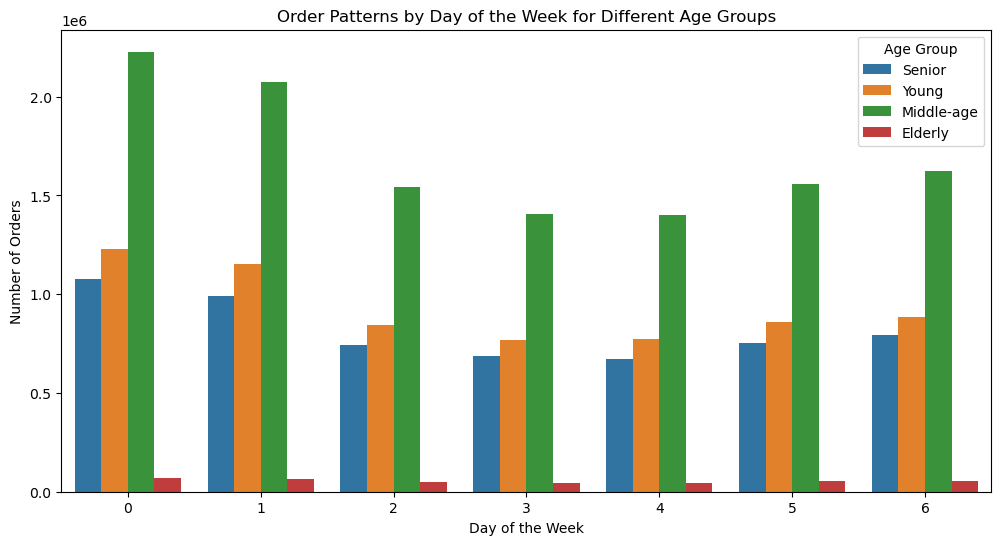

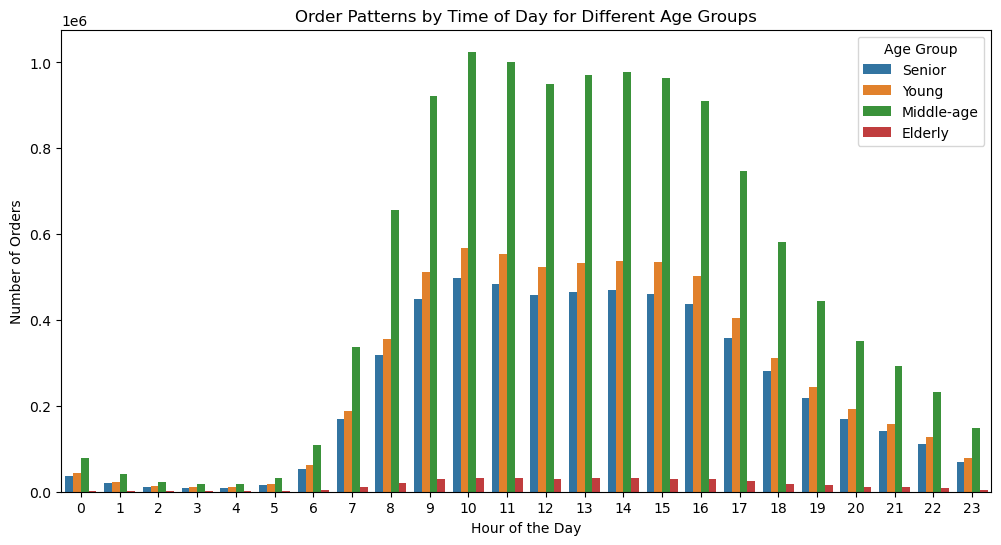

<Figure size 640x480 with 0 Axes>

In [103]:

# Plot order patterns by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='orders_day_of_week', hue='Age group')
plt.title('Order Patterns by Day of the Week for Different Age Groups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend(title='Age Group')
plt.show()

# Plot order patterns by time of day
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='order_hour_of_day', hue='Age group')
plt.title('Order Patterns by Time of Day for Different Age Groups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.legend(title='Age Group')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_agebyday.png'))

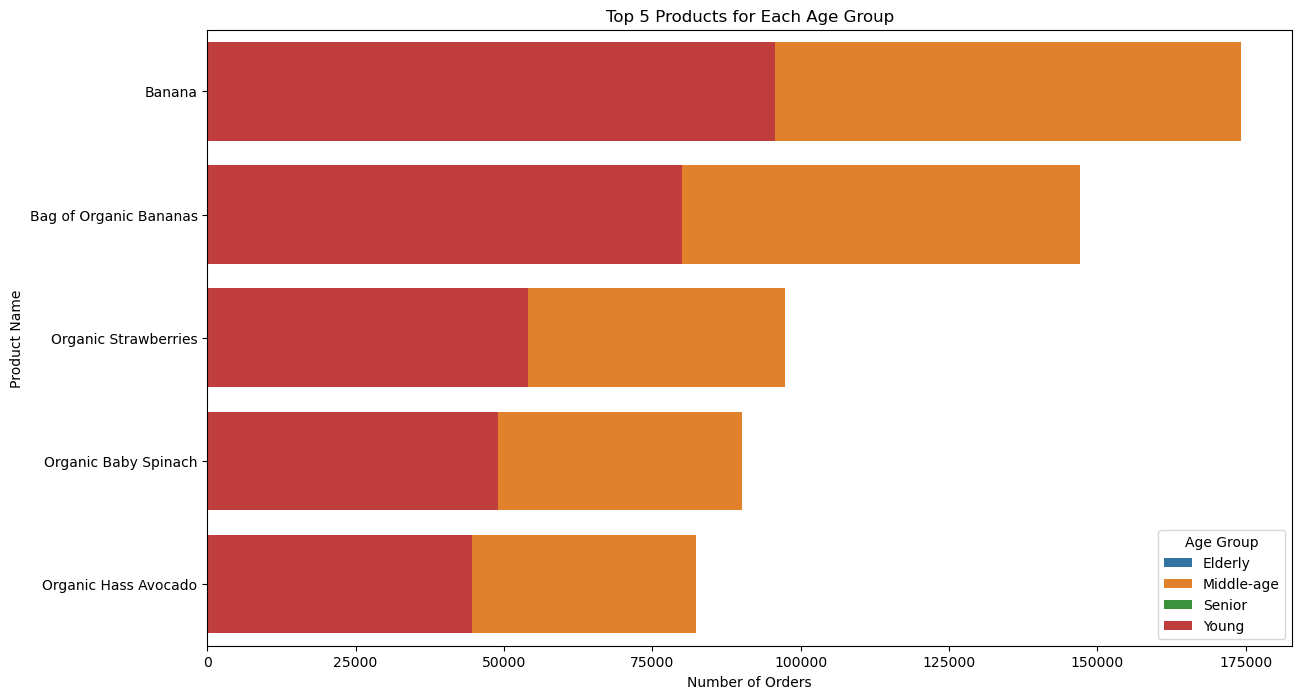

In [93]:
# Get top 5 products for each age group
top5_products_by_age = top_5_products_per_age_group.groupby('Age group').head(5)

# Plot top 5 products for each age group
plt.figure(figsize=(14, 8))
sns.barplot(data=top5_products_by_age, x='count', y='product_name', hue='Age group', dodge=False)
plt.title('Top 5 Products for Each Age Group')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.legend(title='Age Group')
plt.show()

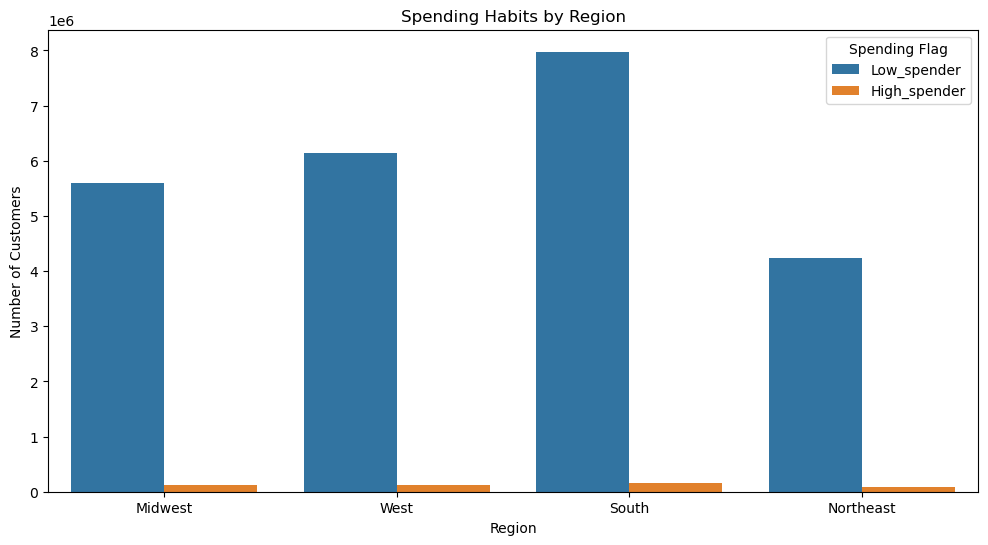

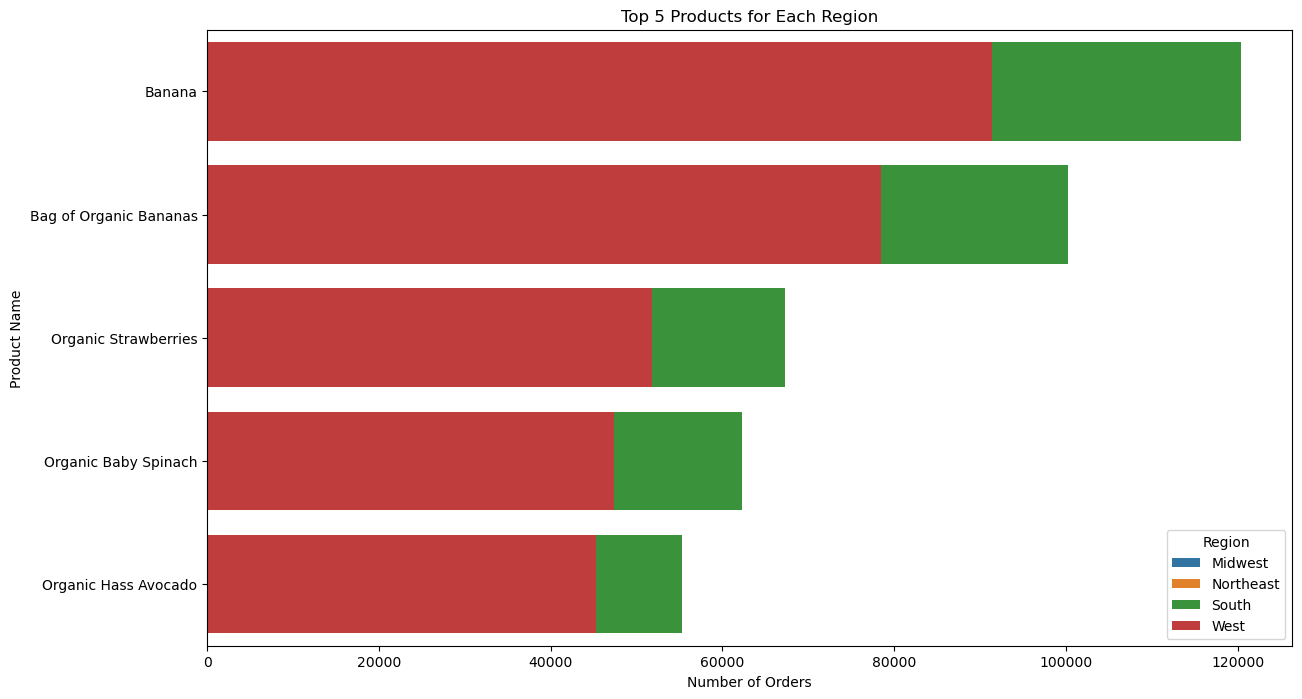

In [94]:
# Plot spending by region
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='region', hue='spender_flag')
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.show()

# Plot top 5 products for each region
top5_products_by_region = popular_products_by_region.groupby('region').head(5)

plt.figure(figsize=(14, 8))
sns.barplot(data=top5_products_by_region, x='count', y='product_name', hue='region', dodge=False)
plt.title('Top 5 Products for Each Region')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.legend(title='Region')
plt.show()

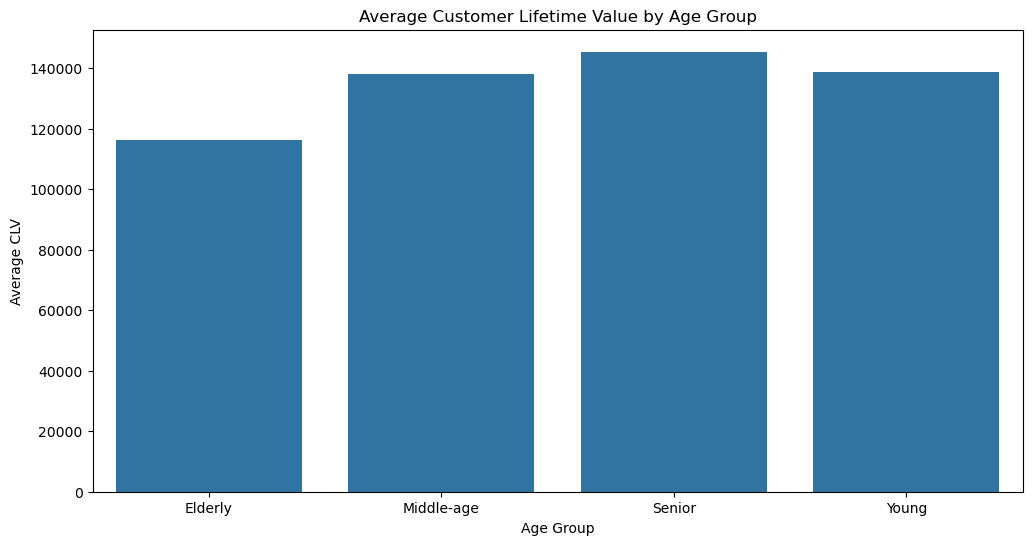

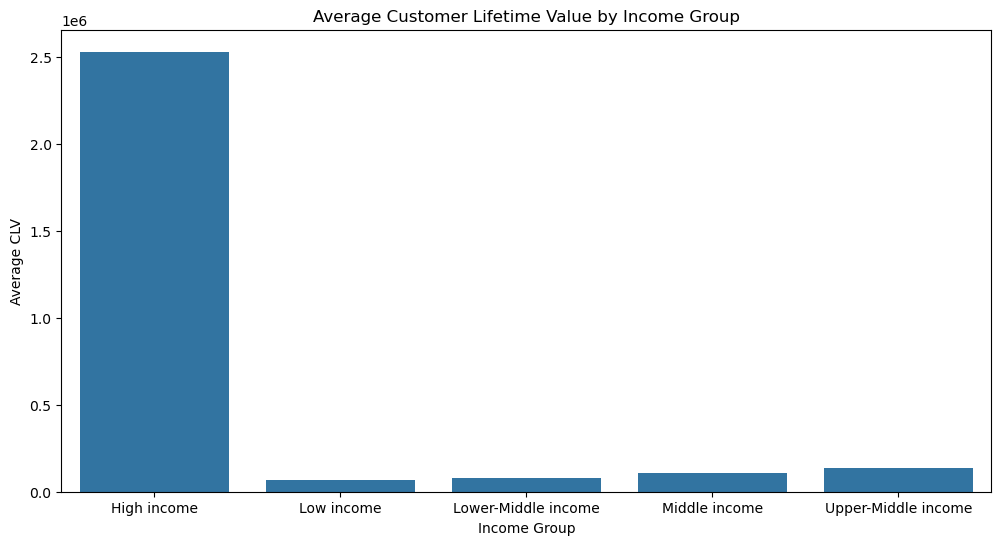

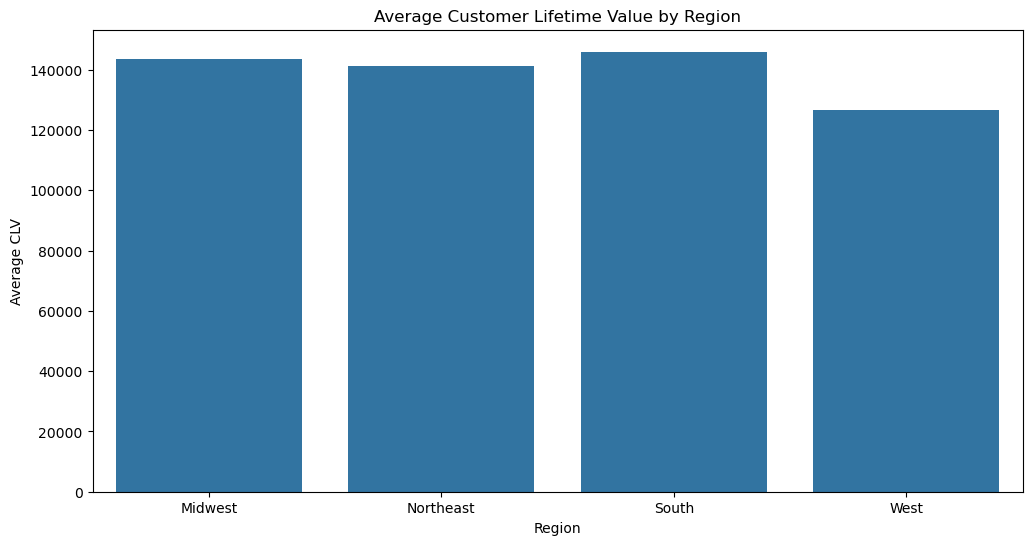

In [95]:
# Plot CLV by Age group
plt.figure(figsize=(12, 6))
sns.barplot(data=clv_by_age, x='Age group', y='Average CLV')
plt.title('Average Customer Lifetime Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average CLV')
plt.show()

# Plot CLV by Income group
plt.figure(figsize=(12, 6))
sns.barplot(data=clv_by_income, x='Income group', y='Average CLV')
plt.title('Average Customer Lifetime Value by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average CLV')
plt.show()

# Plot CLV by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=clv_by_region, x='region', y='Average CLV')
plt.title('Average Customer Lifetime Value by Region')
plt.xlabel('Region')
plt.ylabel('Average CLV')
plt.show()


## Conclusions and Recommendations
### Behavioral Patterns:
1. Order Patterns by Frequency Flag:


- Frequent customers tend to order more consistently throughout the day.
- Non-frequent customers show less consistent ordering times.

2. Order Patterns by Add-to-Cart Order:

- Frequent customers show higher add-to-cart orders, indicating more considered shopping behavior.

### Product Preferences:

1. Top Products by Age Group:

- Popular products include bananas, organic bananas, and organic strawberries across all age groups.
- Middle-aged and young customers have higher counts for organic products.

2. Top Products by Region:

- Bananas and organic products are consistently popular across all regions.
- Midwest has a significantly higher count of certain products like organic strawberries.

### Geographic Analysis:

1. Spending by Region:
- All regions show higher spending counts for low spenders compared to high spenders.
- The South and Midwest regions have the highest low spender counts.

### Customer Lifetime Value (CLV):
- Frequent customers, though fewer in number, show high reorder rates, indicating potential for high CLV.
- High-spender account for small number of customer but order the most from Instacart
- Regular and non-frequent customers have lower reorder rates, suggesting targeted engagement strategies may be needed.


## Recommendations

### Targeted Marketing Strategies:

- Age Groups: Focus on promoting organic products to middle-aged and young customers.
- Regions: Tailor marketing campaigns to highlight popular regional products, such as bananas in the Midwest.
- High CLV Customers: Create loyalty programs for frequent customers to maintain their engagement and increase CLV.
- Behavioral Insights:

- Order Timing: Offer time-specific promotions to encourage non-frequent customers to shop more consistently.
- Add-to-Cart Engagement:
+) Simplify the shopping process for non-frequent customers to reduce friction and improve their shopping experience.
+) Consider add more value when customer are hesitate when preparing order

In [105]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000


In [111]:
df_final['product_id'].value_counts(dropna = False)

product_id
24852    358668
13176    303632
21137    201955
21903    184749
47209    169658
          ...  
10593         1
14770         1
13433         1
40437         1
18506         1
Name: count, Length: 49416, dtype: int64